# Project Titanic - Part II - Ryan Sobolewski

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

## 1) Upload this jupyter notebook page to your colab




## 2) Get the Shareable link for your page and update the URL below for your Jupyter Notebook:
- _Make sure you select __'Anyone with the Link'__ option_

__This jupyter notebook page is located at__: https://colab.research.google.com/drive/1KuYV9PESMRXzpxmlLq7BBsy46uWHb4F_?usp=sharing

We will click on the link above to visit to your Jupyter Notebook page.

## 3) Get the Data:
### Download the data (train.csv and test.csv files) from Kaggle and then upload them using the first code block below. 
- To download the files, login to [Kaggle](https://www.kaggle.com/) and go to the [Titanic challenge](https://www.kaggle.com/c/titanic)


Keep the following code block as it is. Use it to upload the donwloaded csv files and to save them into your colab:

In [ ]:
from google.colab import files
import pandas as pd
import io
import os

train_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('train.csv') #remove the file created during upload that is in the root folder
train_data = pd.read_csv(io.StringIO(train_data_dict['train.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

test_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('test.csv') #remove the file created during upload that is in the root folder
test_data = pd.read_csv(io.StringIO(test_data_dict['test.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

titanic_dir_path = os.path.join("datasets", "titanic")
os.makedirs(titanic_dir_path, exist_ok=True) #create the folder
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data.to_csv(train_csv_path, index=False) #save the data to csv file
test_data.to_csv(test_csv_path, index=False) #save the data to csv file

Saving train.csv to train.csv


Saving test.csv to test.csv


Once you upload the data, they will be saved into the `datasets/titanic` directory. After uploading, you don't need to upload them again. You can start run your code starting the below code block.

In [ ]:
import pandas as pd
import os

titanic_dir_path = os.path.join("datasets", "titanic")
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)


## __The questions under section 4 were in the Part I of the project. For this assignment, you need to answer the questions under section 5__.

## You can skip to 4.5

## Discover, Visualize, Prepare Data:

###	4.1) Which attributes do we have, and what are they meaning? List the attributes and then briefly explain. To get the description of the attributes, you can do a little research on the web. No code is needed to answer this question.
-------------------------------------


### 4.2) Show your results and explain the insights you got by studying the data with each of the following methods on both the train and test data (Note: I am not looking for a long list of insights, 2-3 insights per method execution would be fine):


#### 4.2.a.	head()


#### 4.2.b.	info()

#### 4.2.c.	describe()

#### 4.2.d.	value_counts()

### 4.3)	Prepare a DataFrame that contains the following numeric fields: Survided, Sex, Age, SibSp, Parch, Fare. Plot these numeric fields on a histogram. Did you notice anything new using the histogram?

### 4.4) Use groupby of Pandas to answer the following questions. 
For the following examples, use group by and plot for example:
> dataFrame.groupby(‘attribute1’)[‘attribute2’].median()

> dataFrame.groupby(‘attribute1’)[‘attribute2’].median().plot(kind=’bar’)


#### 4.4) a)	Find the average survival rate based on passenger class and plot the results.  What is the insight you gain? 



#### 4.4) b)	Find the average survival rate based on sex and plot the results. What is the insight?

#### 4.4) c) Find the median age by Pclass and Sex.

#### 4.4) d)	Find out the median fare based on passenger class and embarked place. 

##__4.5 includes the code (solutions) needed to start section 5.__

### 4.5) Work on missing values on the whole data set. Examples:
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280
PDF is attached to the assignment.

#### 4.5) a) Perform the followings:
- 1) Create a new 'all_data' frame by appending test data to train data. 

- 2) Using pandas methods see and show that some indexes repeat. Find a way to Use re-organize the index so that they are unique and do not have an extra 'index' column.

- 3) Then check the data using the info() method and list which columns have missing data (other than 'Survived')

In [ ]:
all_data = train_data.append(test_data) # important
all_data.reset_index(inplace = True, drop = True) # reset the inde inplace and drop the created extra 'index' column
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) b) Fill missing values of 'Age' field with the median age of the passenger class and sex that you found for the question above. Use the apply method with lambda function. 


In [ ]:
# Fill in missing age information based on the median age for its class and sex.
all_data['Age'] = all_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) d) Fill missing values of 'Cabin' field with the 'NA' value.

In [ ]:
all_data.Cabin = all_data.Cabin.fillna('NA')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) e) Fill missing values of 'Embarked' field with the most frequently seen 'Embarked' value.

In [ ]:
# Fill in missing Embarked based on the most frequent Embarked
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### 4.5) c) Fill missing values of 'Fare' field with the median fare of the passenger class and embarked location that you found for the question above. Use the apply method with lambda function. 

In [ ]:
# Fill in missing fare based on its class and embarked place
all_data['Fare'] = all_data.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x : x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Next Questions are __for Part II__. 

## __Feature Engineering__

#### 5) 1) Create a new feature 'Family_Size'
- Create a new feature 'Family_Size' using other features (and also adding the person him/herself to the family size). 
- Then plot a bar chart to show how many of each 'Family_Size' value exists. 
- Finally plot a bar chart to show the relationship between 'Family_Size' and the 'Survival' 

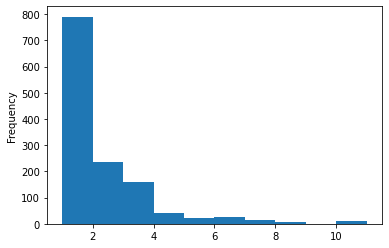

In [ ]:
all_data['Family_Size'] = all_data['Parch'] + all_data['SibSp'] + 1
all_data['Family_Size'].plot.hist()

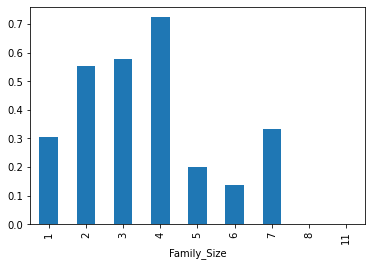

In [ ]:
all_data[['Family_Size', 'Survived']].groupby('Family_Size')['Survived'].mean().plot(kind='bar')

#### 5) 2) Create a new feature 'Fare_Category'
- Use qcut method of Pandas for creating 'Fare_Category' field from Fare so that we have 5 categories of Fare. Note that: 1) With qcut We decompose a distribution so that there are (approximately) the same number of cases ineach category. 2) qcut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.
- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Fare_Category' and the 'Survival'

In [ ]:
all_data['Fare_Category'] = pd.qcut(all_data['Fare'],5).astype(str)
all_data['Fare_Category'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare_Category, dtype: int64

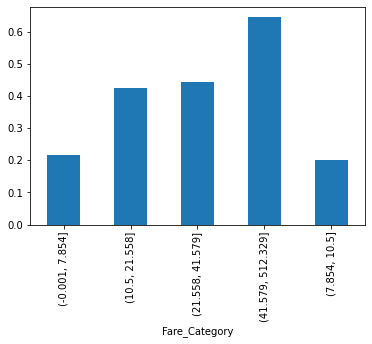

In [ ]:
all_data[['Fare_Category', 'Survived']].groupby('Fare_Category')['Survived'].mean().plot(kind='bar')

#### 5) 3) Create a new feature 'Age_Category'
- Use cut method of Pandas for creating 'Age_Category' field from Age so that we have 5 categories of Age. Note that: 1) With cut, the bins are formed based on the values of the variable, regardless of how many cases fall into a category. 2) cut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.

- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Age_Category' and the 'Survival'


In [ ]:
all_data['Age_Category'] = pd.cut(all_data['Age'],5).astype(str)
all_data['Age_Category'].value_counts()

(16.136, 32.102]    748
(32.102, 48.068]    308
(0.0902, 16.136]    134
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: Age_Category, dtype: int64

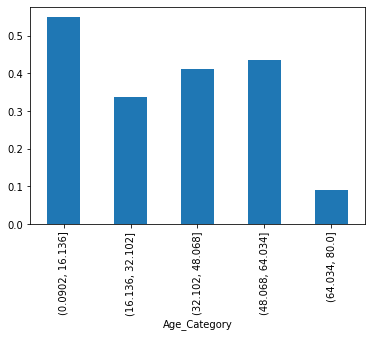

In [ ]:
all_data[['Age_Category', 'Survived']].groupby('Age_Category')['Survived'].mean().plot(kind='bar')

### 6) Encoders


#### 6) 1) Using LabelEncoder, create the 'Sex_Numeric' based on the values of the 'Sex' attribute.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(all_data['Sex'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 1, 1, 1])

#### 6) 2) Use OneHotEncoder to create new attributes for the 'Embarked' attribute.

Note: You can benefit from the following article for One-Hot-Encoding questions:
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(all_data['Embarked'].values.reshape(-1,1)).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

#### 6) 3) Use OneHotEncoder to create new attributes for the 'Fare_Category' attribute.

In [ ]:
ohe2 = OneHotEncoder()
ohe2.fit_transform(all_data['Fare_Category'].values.reshape(-1,1)).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

#### 6) 4) Use OneHotEncoder to create new attributes for the 'Age_Category' attribute.

In [ ]:
ohe3 = OneHotEncoder()
ohe3.fit_transform(all_data['Age_Category'].values.reshape(-1,1)).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#### 6) 5) Use OneHotEncoder to create new attributes for the 'PClass' attribute.

In [ ]:
ohe4 = OneHotEncoder()
ohe4.fit_transform(all_data['Pclass'].values.reshape(-1,1)).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

### 6) 6) Convert 'Sex_Numeric' and 'Family_Size' fields to 'float16'.

### 7) 1) Create the correlation matrix for the all_data data frame and show the values for 'Survived' column in an descending order.

In [ ]:
all_data.groupby(['Survived']).corr()

PassengerId    Pclass  ...      Fare  Family_Size
Survived                                     ...                       
0.0      PassengerId     1.000000  0.051184  ... -0.084730    -0.054965
         Pclass          0.051184  1.000000  ... -0.517378     0.119269
         Age             0.011612 -0.482633  ...  0.110570    -0.262964
         SibSp          -0.067959  0.125714  ...  0.282108     0.918693
         Parch          -0.015871  0.068482  ...  0.347307     0.786021
         Fare           -0.084730 -0.517378  ...  1.000000     0.354711
         Family_Size    -0.054965  0.119269  ...  0.354711     1.000000
1.0      PassengerId     1.000000 -0.167362  ...  0.093981    -0.004235
         Pclass         -0.167362  1.000000  ... -0.538125    -0.005853
         Age             0.079598 -0.445265  ...  0.180808    -0.272927
         SibSp          -0.033921 -0.033300  ...  0.122886     0.781312
         Parch           0.024641  0.021584  ...  0.116519     0.819438
         Fare            0.093981 -0.538125  ...  1.000000     0.149237
         Family_Size    -0.004235 -0.005853  ...  0.149237     1.000000

[14 rows x 7 columns]

### 7) 2) Based on the correlation matrix results, identify some of the features as unimportant and drop them and assign the remaining DataFrame to the variable named 'important_data'. When you drop features, leave at least 10 columns besides 'Survivided' in the 'important_data' DataFrame. After that, check the correlation to 'Survived' as you did before.

In [ ]:
important_data = all_data
important_data = important_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Sex_Numeric', 'Embarked2', 'Fare_Category2','Age_Category2','Pclass2'], axis=1)
important_data.groupby(['Survived']).corr()

PassengerId    Pclass  ...      Fare  Family_Size
Survived                                     ...                       
0.0      PassengerId     1.000000  0.051184  ... -0.084730    -0.054965
         Pclass          0.051184  1.000000  ... -0.517378     0.119269
         Age             0.011612 -0.482633  ...  0.110570    -0.262964
         SibSp          -0.067959  0.125714  ...  0.282108     0.918693
         Parch          -0.015871  0.068482  ...  0.347307     0.786021
         Fare           -0.084730 -0.517378  ...  1.000000     0.354711
         Family_Size    -0.054965  0.119269  ...  0.354711     1.000000
1.0      PassengerId     1.000000 -0.167362  ...  0.093981    -0.004235
         Pclass         -0.167362  1.000000  ... -0.538125    -0.005853
         Age             0.079598 -0.445265  ...  0.180808    -0.272927
         SibSp          -0.033921 -0.033300  ...  0.122886     0.781312
         Parch           0.024641  0.021584  ...  0.116519     0.819438
         Fare            0.093981 -0.538125  ...  1.000000     0.149237
         Family_Size    -0.004235 -0.005853  ...  0.149237     1.000000

[14 rows x 7 columns]

### 8) 1) Create X_train, Y_train and X_test DataFrames. Note that X_train should have 891 instances and the rest should go to X_test. Drop the 'Survived' from X_test. Check the X_train, X_test and Y_train.

In [ ]:
important_data = important_data.drop(['Fare_Category', 'Age_Category'], axis=1)
X_train = important_data[0:891]
Y_train = important_data[0:891]
X_test = important_data[892:1391]

### 8) 2) Use StandardScaler of Scikit Learn to scale the 'Fare' feature of both X_train and X_test. 

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[-1.72790218,         nan,  0.87532977, ..., -0.40080432,
        -0.51267185,  0.10422912],
       [-1.71959495,         nan, -0.31363607, ..., -0.40080432,
        -0.46454347, -0.55430942],
       [-1.71128773,         nan,  0.87532977, ..., -0.40080432,
        -0.48289941, -0.55430942],
       ...,
       [ 1.71128773,         nan,  0.87532977, ..., -0.40080432,
        -0.50819479, -0.55430942],
       [ 1.71959495,         nan,  0.87532977, ..., -0.40080432,
        -0.4938682 , -0.55430942],
       [ 1.72790218,         nan,  0.87532977, ...,  0.61831399,
        -0.23763183,  0.76276766]])

## 9) Run all of your code and get your output

## 10) Print the latest status of your notebook to a pdf file 
- The pdf file __must include the link of your jupyter notebook page__ (see step 2 above)

## 11) __Submit the PDF__ file on Canvas